# First, load data for testing

In [1]:
# Load the iris module (data to play with)
from sklearn.datasets import load_iris

In [2]:
# Put the iris dataset into the iris var
iris = load_iris()
print(iris.data.size)

600


In [3]:
# Examine iris
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris["feature_names"])
print(iris["data"][:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [6]:
print(iris["target_names"])
print(iris["target"])

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Create a decision tree

In [7]:
# Import the ability to make a decision tree
from sklearn import tree

In [8]:
# Set up your tree.
clf = tree.DecisionTreeClassifier()

In [9]:
# Train the tree on all the data.
clf = clf.fit(iris.data, iris.target)

In [10]:
# Make a prediction
clf.predict([[4.65, 1.30, 2.80, 4.80]])

array([1])

In [11]:
# In practice, you should split your data into a training set and
# a test set.

# Import the ability to split data
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    iris.data, iris.target, test_size=0.33
)

In [12]:
# Let's look at the splits
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

print("")

print(train_features[0])
print(train_labels[0])

(100, 4)
(50, 4)
(100,)
(50,)

[6.1 3.  4.9 1.8]
2


In [13]:
# Train the tree on the training data
clf = clf.fit(train_features, train_labels)

In [14]:
# Make predictions on the test data
predictions = clf.predict(test_features)

# Compare the predictions to the actual labels
print("Predicted:\n", predictions)
print("Actual:\n", test_labels)

# Import the ability to calculate accuracy
from sklearn.metrics import accuracy_score

# Calculate the accuracy
print(accuracy_score(test_labels, predictions))

Predicted:
 [2 2 0 0 0 0 0 1 0 0 0 1 2 0 2 2 1 0 0 1 1 2 0 1 1 2 1 0 0 0 1 1 1 1 1 1 2
 0 0 2 1 2 0 1 2 1 2 1 1 1]
Actual:
 [2 2 0 0 0 0 0 1 0 0 0 1 2 0 2 2 1 0 0 1 1 2 0 1 1 2 1 0 0 0 1 1 1 2 1 1 2
 0 0 2 1 2 0 1 2 2 2 1 1 1]
0.96


# Now similarly train an SVM

In [15]:
# Import the ability to make a svm
from sklearn import svm

In [16]:
# Set up your SVM.
clf = svm.SVC(kernel='rbf', gamma=0.7)

In [17]:
# Train the svm on the training data
clf = clf.fit(train_features, train_labels)

In [18]:
# Make predictions on the test data
predictions = clf.predict(test_features)

# Compare the predictions to the actual labels
print("Predicted:\n", predictions)
print("Actual:\n", test_labels)

# Calculate the accuracy
print(accuracy_score(test_labels, predictions))

Predicted:
 [2 2 0 0 0 0 0 1 0 0 0 1 2 0 2 2 1 0 0 1 1 2 0 1 1 2 1 0 0 0 1 1 1 2 1 1 2
 0 0 2 1 2 0 1 2 2 2 1 1 1]
Actual:
 [2 2 0 0 0 0 0 1 0 0 0 1 2 0 2 2 1 0 0 1 1 2 0 1 1 2 1 0 0 0 1 1 1 2 1 1 2
 0 0 2 1 2 0 1 2 2 2 1 1 1]
1.0


# K-means clustering (unsupervised)

In [19]:
# Import the ability to cluster
from sklearn.cluster import KMeans

In [20]:
# Set up your k-means learner.
clf = KMeans(n_clusters=3)

In [21]:
# Train the learner. 
# QUESTION: Why no iris.target? Why ignoring training vs. testing?
clf = clf.fit(iris.data)

In [22]:
# Look at the cluster assignments
label_pred = clf.predict(iris.data)
print(label_pred)
print(iris.target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


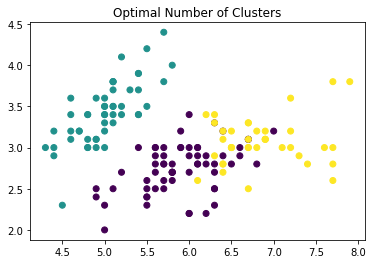

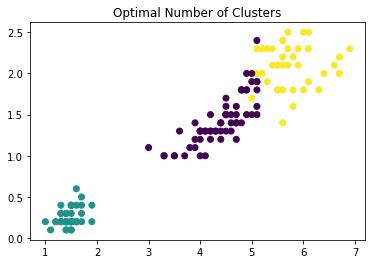

In [25]:
import matplotlib.pyplot as plt
import matplotlib


plt.scatter(iris.data[:, 0], iris.data[:, 1], c=label_pred)
plt.title("Optimal Number of Clusters")
plt.show()

plt.scatter(iris.data[:, 2], iris.data[:, 3], c=label_pred)
plt.title("Optimal Number of Clusters")
plt.show()